In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)

Drop all the name columns first as not using. Then drop the rows with NA 

In [3]:
df1 = pd.read_csv("politifact dataset with biodata.csv")
df1.isna().sum()

Unnamed: 0             0
name                   0
claim date             0
claim source         138
claim                  0
issue                  0
accuracy rating        0
id.bioguide        19460
id.wikipedia       18278
name.first         18278
name.middle        22474
name.last          18278
bio.gender         18278
bio.birthday       18307
type               18278
party              18281
start              18278
end                18278
state              19460
full name          18278
dtype: int64

In [4]:
df1.drop(columns=['name.middle','name.last','name.first'],inplace=True)
df1.dropna(inplace=True)
df1.reset_index(inplace=True)

In [5]:
df1.shape

(6396, 18)

In [6]:
df1.isna().sum()

index              0
Unnamed: 0         0
name               0
claim date         0
claim source       0
claim              0
issue              0
accuracy rating    0
id.bioguide        0
id.wikipedia       0
bio.gender         0
bio.birthday       0
type               0
party              0
start              0
end                0
state              0
full name          0
dtype: int64

In [7]:
df1['accuracy rating'].unique()

array(['mostly-true', 'barely-true', 'half-true', 'FALSE', 'TRUE',
       'pants-fire'], dtype=object)

In [8]:
true = ['mostly-true', 'TRUE']
false = ['barely-true', 'FALSE', 'half-true', 'pants-fire']
df1['accuracy'] = df1['accuracy rating'].apply(lambda x: 0 if x in false else 1) # assign numerical value to labels

Plots on the different features

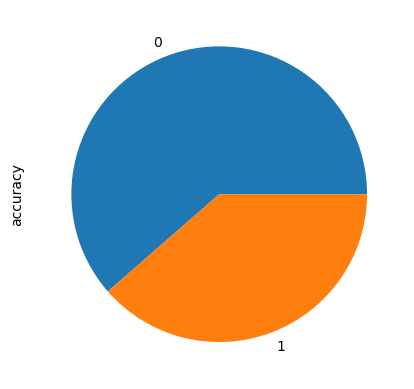

In [9]:
df1['accuracy'].value_counts().plot(kind='pie')
plt.show()

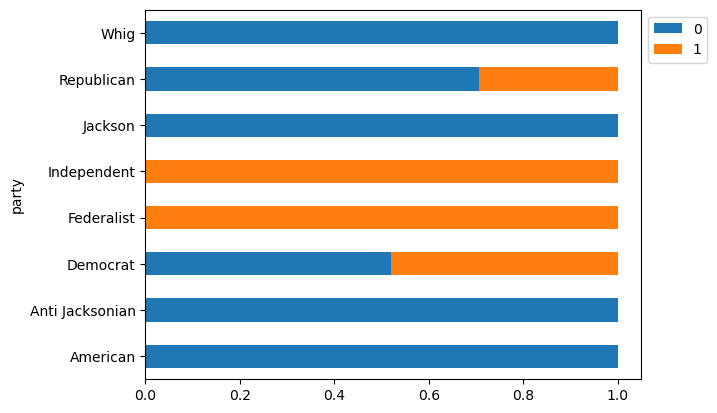

In [10]:
df1.groupby(by=['party'])['accuracy'].value_counts(normalize=True).unstack().plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

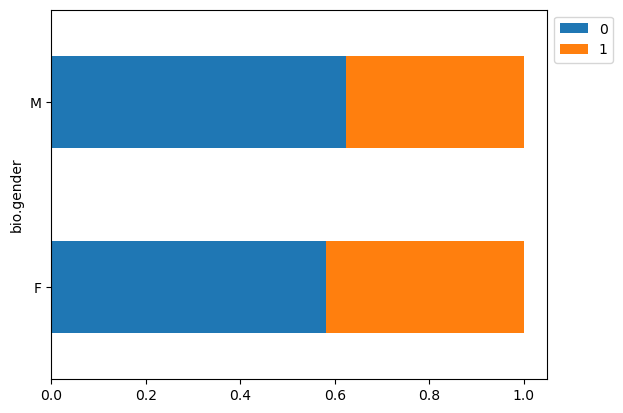

In [11]:
df1.groupby(by=['bio.gender'])['accuracy'].value_counts(normalize=True).unstack().plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

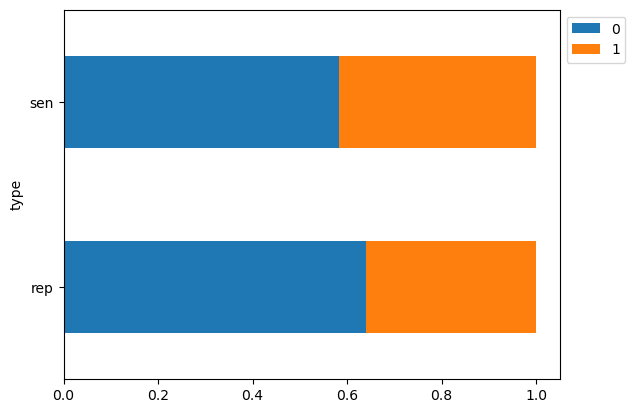

In [12]:
df1.groupby(by=['type'])['accuracy'].value_counts(normalize=True).unstack().plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.show()

In [13]:
num_unique_issues = df1['issue'].nunique()
print(f'There are {num_unique_issues} unique issues.')

There are 85 unique issues.


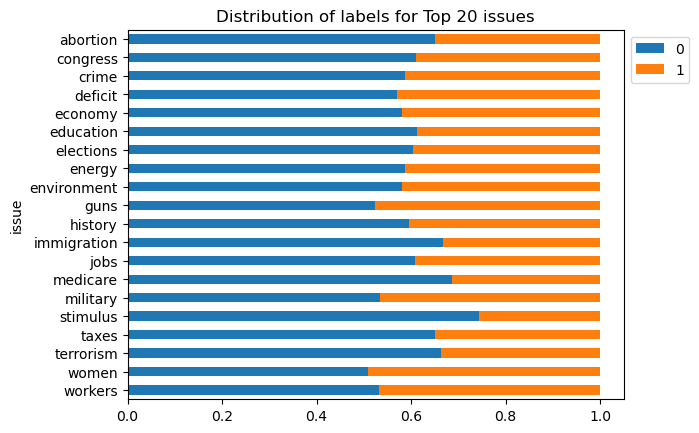

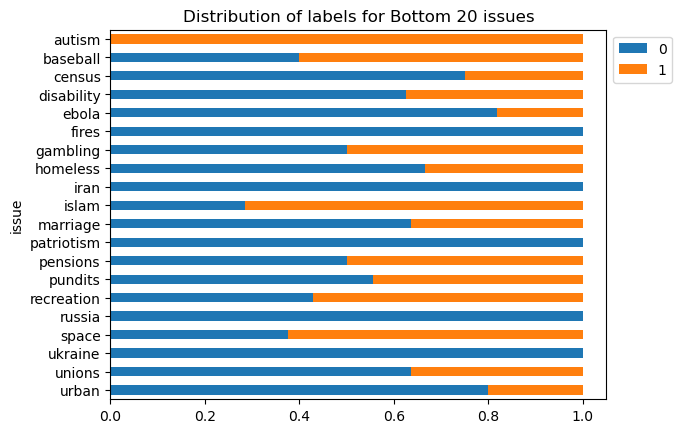

In [14]:
top_20_issues = df1.groupby('issue')['accuracy'].size().sort_values(ascending=False).head(20).index.sort_values()

# find bottom 20 issues based on freq counts
bottom_20_issues = df1.groupby('issue')['accuracy'].size().sort_values(ascending=False).tail(20).index.sort_values()
temp = df1[df1['issue'].isin(top_20_issues)]
temp['issue'].unique()
temp.groupby(by=['issue'])['accuracy'].value_counts(normalize=True).unstack().sort_index(ascending=False).plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Distribution of labels for Top 20 issues')

temp = df1[df1['issue'].isin(bottom_20_issues)]
temp['issue'].unique()
temp.groupby(by=['issue'])['accuracy'].value_counts(normalize=True).unstack().sort_index(ascending=False).plot(kind='barh',stacked=True)
plt.legend(bbox_to_anchor=(1.0, 1.0))
plt.title('Distribution of labels for Bottom 20 issues')
plt.show()

In [69]:
df1.to_csv("Politifact with biodata NA dropped.csv")